# Loading Data

## Reading&nbsp;from&nbsp;CSV&nbsp;files

In [6]:
# Loading Data - Reading from CSV files

import pandas as pd #from panda library we can take the function inside, just put pd.functionwewant
import numpy as np #from numby library we can take the mathematical function inside, just put pd.functionwewant
import datetime # To measure execution time etc.
import pickle # To load files stored in the Pickle format
import matplotlib.pyplot as plt # For visualizing data
!pip install missingno 
#put in comment the part above once installed, otherwise it will be an error message (because it's re-installing all the time)
import missingno as msno # For dealing with missing values in the data
import io #normal "input-output" library
!pip install -U ipykernel
!pip install modin[dask]
#put in comment the part above once installed, otherwise it will be an error message (because it's re-installing all the time)
import modin.pandas as modpd

Requirement already up-to-date: ipykernel in c:\users\rahul\anaconda3\lib\site-packages (6.0.2)
  Using cached modin-0.10.1-py3-none-win_amd64.whl (691 kB)


Solar generation and load are floating point numbers, which represent power expressed in MW (Mega Watts) units

1 hour time step

In [7]:
# dataset from: https://www.kaggle.com/arielcedola/solar-generation-and-demand-italy-20152016

cons = pd.read_csv("C:/Users/Rahul/Downloads/TimeSeries_TotalSolarGen_and_Load_IT_2015.csv",delimiter=",") # import data
# we store all the data in a variable called "cons"
# pd.read_csv is a function from panda (pd) library to read/open cvs file
# the "delimiter" specification will give us a correct visualization of the file (otherwise, change delimiter)

In [8]:
print(cons.columns) #To see all the columns in your dataframe

Index(['utc_timestamp', 'IT_load_new', 'IT_solar_generation'], dtype='object')


In [9]:
print(list(cons.columns)) #casting the column names into a list

['utc_timestamp', 'IT_load_new', 'IT_solar_generation']


In [10]:
cons.head() #show first 5 rows of the file. 
#We can just increase increase the row showed putting a number in the branket (for example "10")

,utc_timestamp,IT_load_new,IT_solar_generation
0,2015-01-01T00:00:00Z,NaN,0
1,2015-01-01T01:00:00Z,NaN,0
2,2015-01-01T02:00:00Z,NaN,0
3,2015-01-01T03:00:00Z,NaN,0
4,2015-01-01T04:00:00Z,NaN,0


In [11]:
cons.tail() #the same with tail: it will show us the last 5 rows

,utc_timestamp,IT_load_new,IT_solar_generation
8755,2015-12-31T19:00:00Z,30736.0,29
8756,2015-12-31T20:00:00Z,27877.0,29
8757,2015-12-31T21:00:00Z,25654.0,29
8758,2015-12-31T22:00:00Z,23348.0,29
8759,2015-12-31T23:00:00Z,22853.0,0


In [12]:
#check if there are missing data

cons.info()

#there are not missing data in the IT_Solar_generation (that we are using), but we have missing data in the IT_load_new (8760-8401= missing data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   utc_timestamp        8760 non-null   object 
 1   IT_load_new          8401 non-null   float64
 2   IT_solar_generation  8760 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 205.4+ KB


In [13]:
cons.describe()
#This command allows you to quickly calculate important summary statistics (e.g. mean, standard deviation, maximum and minimum) for each column of your data.



,IT_load_new,IT_solar_generation
count,8401.000000,8760.000000
mean,32900.393644,2214.022831
std,7604.359566,3249.824785
min,17268.000000,0.000000
25%,26219.000000,0.000000
50%,32414.000000,29.000000
75%,39215.000000,4077.250000
max,54279.000000,11476.000000


In [14]:
cons.describe().T #we can traspose it, for a better visualization


,count,mean,std,min,25%,50%,75%,max
IT_load_new,8401.0,32900.393644,7604.359566,17268.0,26219.0,32414.0,39215.00,54279.0
IT_solar_generation,8760.0,2214.022831,3249.824785,0.0,0.0,29.0,4077.25,11476.0


## Visualizing and working with data

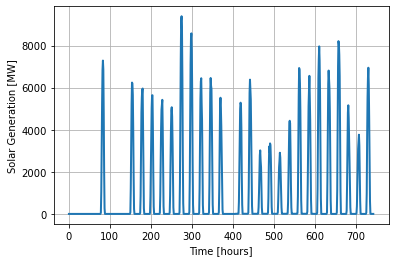

In [15]:
#select a sub-set data for 1 month
#we have 1 hour step between each row
# 24*31 = 744 hours in january

start_index = 0
end_index = 744

plt.plot(cons.IT_solar_generation[start_index:end_index], linewidth=2) #taking solar generation
# linewidth argument will make the line bigger
plt.xlabel('Time [hours]') 
plt.ylabel('Solar Generation [MW]') 
plt.grid(True) #to activate the grid in the plot
plt.show()



## Reshaping and summarizing the time series

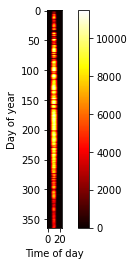

In [16]:
#reordering the 1D time series to a 2D matrix

demand1D = np.array(cons.IT_solar_generation) #take all the rows of the "IT_solar_generation" column
number_hours=24
#24 hours each day
number_of_rows=int(demand1D.shape[0])
#"int(demand1D.shape[0])" give us the number of all rows = 8760
number_days = (8760/24)
#365 days in 1 year
demand2D = demand1D.reshape(365, 24)

plt.imshow(demand2D, cmap='hot')
plt.xlabel('Time of day')
plt.ylabel('Day of year')
plt.colorbar()
plt.show()

## Summarizing the data

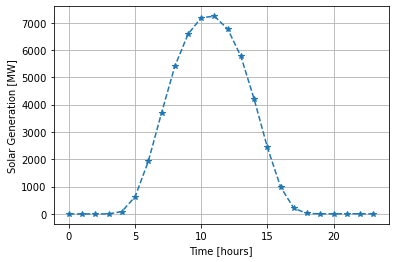

In [17]:
plt.plot(np.mean(demand2D, axis=0), '*--') # mean function in numpy
plt.xlabel('Time [hours]')
plt.ylabel('Solar Generation [MW]')
plt.grid(True)
plt.show()

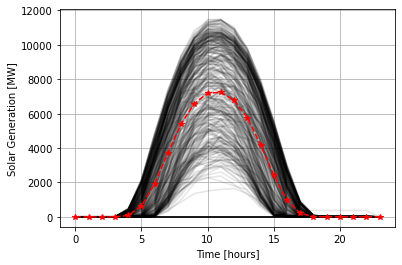

In [18]:
#plotting out all the days of the year as independent time series with the mean value overlaid

plt.plot(demand2D.T, alpha=.1, color='black')
plt.plot(np.mean(demand2D, axis=0), '*--', color='red')
plt.xlabel('Time [hours]')
plt.ylabel('Solar Generation [MW]')
plt.grid(True)
plt.show()

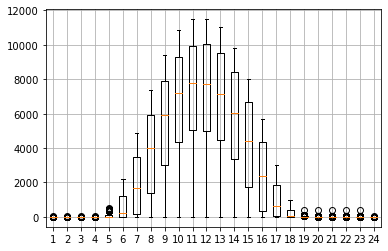

In [19]:
#box plot of the 2D demand signal
# boxplot is a technique that allows one to visualize groups of numerical data through their quartiles 
# Boxplots are non-parametric, in the sense that they display the variability in the data without making any assumptions of the underlying statistical distribution
#A boxplot usually has a few components:
#1) The median, shown here as the red horizontal line in the middle of the box
#2) The box, which shows the 25th to 75th quartile of the data by default
#3) The 'whiskers' (i.e. the vertical lines extending from the boxes) which shows the 5th to 95th percentile by default
#4) The individual points, which extend beyond these percentiles, might be considered as outliers under specific conditions.

plt.boxplot(demand2D)
plt.grid(True)
plt.show()

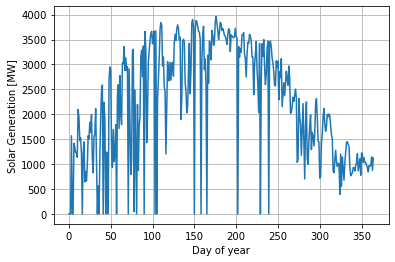

In [20]:
#if there is a clear seasonal trend (on a daily level)

plt.plot(np.mean(demand2D, 1))
plt.xlabel('Day of year')
plt.ylabel('Solar Generation [MW]')
plt.grid(True)
plt.show()

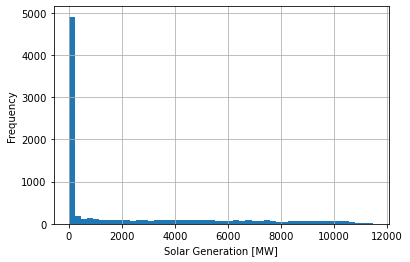

In [21]:
#histogram
#A histogram does away with the temporal dimension, and allows you to focus on the overall distribution of values in your dataset.

plt.hist(demand1D, bins=50)
plt.xlabel('Solar Generation [MW]')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Filtering

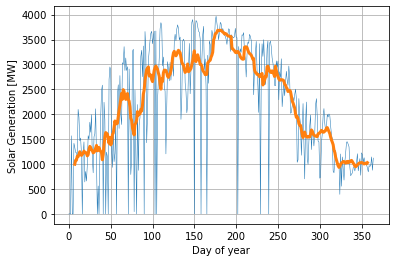

In [22]:
#average filter. This has the effect of suppressing high frequency variations in the time series
#rolling function from panda

plt.plot(np.mean(demand2D, 1), linewidth=0.5)
plt.plot(pd.Series(np.mean(demand2D, 1)).rolling(
    15, center=True).mean(), linewidth=3)
plt.xlabel('Day of year')
plt.ylabel('Solar Generation [MW]')
plt.grid(True)
plt.show()

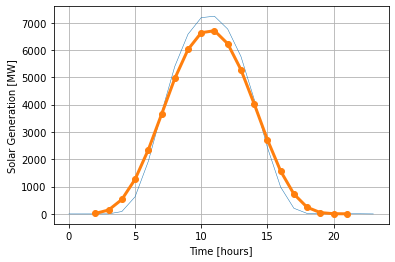

In [23]:
#similar filter to the time-of-day

plt.plot(np.mean(demand2D, 0), linewidth=0.5)
plt.plot(pd.Series(np.mean(demand2D, 0)).rolling(
    5, center=True).mean(), 'o-', linewidth=3)
plt.xlabel('Time [hours]')
plt.ylabel('Solar Generation [MW]')
plt.grid(True)
plt.show()

## Resampling data

In [31]:
#resample data to hourly data, which is then easier to process and visualize.


index = pd.date_range(start='2015-01-01', periods=24*365, freq='60T') #change frequency: the values are each hour
new_dataframe = pd.DataFrame(demand1D)
new_dataframe.index = index

In [32]:
# resample function to sample data to multiple aggregation levels (hourly, daily, monthly and weekly)

hourly_demand = new_dataframe.resample('1H').mean()
daily_demand = new_dataframe.resample('1D').mean()
weekly_demand = new_dataframe.resample('1W').mean()
monthly_demand = new_dataframe.resample('1M').mean()

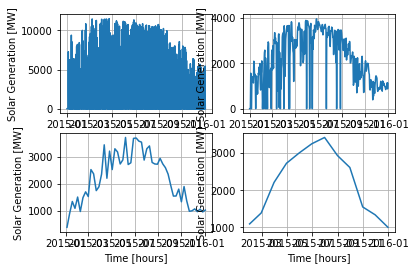

In [33]:
# creating subplot

fig = plt.figure()

plt.subplot(2, 2, 1)
plt.plot(hourly_demand)
plt.xlabel('Time [hours]')
plt.ylabel('Solar Generation [MW]')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(daily_demand)
plt.xlabel('Time [hours]')
plt.ylabel('Solar Generation [MW]')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(weekly_demand)
plt.xlabel('Time [hours]')
plt.ylabel('Solar Generation [MW]')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(monthly_demand)
plt.xlabel('Time [hours]')
plt.ylabel('Solar Generation [MW]')
plt.grid(True)

plt.show()

## Alternative visualization tools

In [27]:
#Plotly, a visualization library to create interactive visualizations
#With this plot, you can easily zoom into your time series to explore fine-grained detail

import plotly.graph_objects as go
fig = go.Figure(data=go.Scatter(x=np.arange(len(demand1D)), 
                                y=demand1D))
fig.update_layout(xaxis_title='Time [hours]', 
                  yaxis_title='Solar Generation [MW]')
fig.show()

ModuleNotFoundError: No module named 'plotly'

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b0dbce64-4ae4-4afb-8b2d-61561613dd0e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>